In [1]:
'''导入包与数据'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bra = pd.read_csv(r"E:\lx\homework\python_work\bra\bra.csv")
bra_color = pd.read_csv(r"E:\lx\homework\python_work\bra\colors.csv")

In [3]:
'''将两个数据合并为一个数据，方便进行后续操作'''
bra = pd.merge(bra, bra_color, left_on='productColor', right_on='0')

In [4]:
bra

,creationTime,productColor,productSize,Unnamed: 0,0,1
0,2016-06-08 17:17:00,22咖啡色,75C,0,22咖啡色,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,0,22咖啡色,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,0,22咖啡色,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,0,22咖啡色,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,0,22咖啡色,棕色
...,...,...,...,...,...,...
15492,2017-11-03 16:39:13,粉色套装（含内裤）,34A/75A,116,粉色套装（含内裤）,粉色
15493,2017-11-07 23:03:10,粉色套装（含内裤）,34B/75B,116,粉色套装（含内裤）,粉色
15494,2017-11-14 17:25:37,粉色套装（含内裤）,34A/75A,116,粉色套装（含内裤）,粉色
15495,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,116,粉色套装（含内裤）,粉色


In [5]:
bra = bra.drop(columns=['productColor', 'Unnamed: 0', '0'])
bra = bra.dropna()
bra = bra.reset_index(drop=True)

In [6]:
bra

,creationTime,productSize,1
0,2016-06-08 17:17:00,75C,棕色
1,2017-04-07 19:34:25,80B,棕色
2,2017-08-03 20:39:18,80B,棕色
3,2016-07-06 14:02:08,75B,棕色
4,2017-03-18 11:49:55,80B,棕色
...,...,...,...
15491,2017-11-03 16:39:13,34A/75A,粉色
15492,2017-11-07 23:03:10,34B/75B,粉色
15493,2017-11-14 17:25:37,34A/75A,粉色
15494,2017-11-11 00:13:32,36C/80C,粉色


In [7]:
bra = bra.rename(columns={'1':'productColor'})

In [8]:
'''设置尺码的正则表达式'''
import re
situation_one = re.compile(r'[7-9]\d[A-Z]')
situation_two = re.compile(r'[A-Z][7-9]\d')
situation_three = re.compile(r'\d{2}/\d{2}[A-Z]')

In [9]:
'''进行数据的清洗'''
for i in range (len(bra)):
    try:
        re_data_one = situation_one.findall(bra['productSize'][i])
        re_data_two = situation_two.findall(bra['productSize'][i])
        re_data_three = situation_three.findall(bra['productSize'][i])
        if re_data_one:
            bra['productSize'][i] = re_data_one[0]
        if re_data_two:
            bra['productSize'][i] = bra['productSize'][i][1:] + bra['productSize'][i][0]
        if re_data_three:
            bra['productSize'][i] = max(re.compile(r'\d{2}').findall(bra['productSize'][i])) + bra['productSize'][i][-1]
        else:
            continue
    except:
        continue
        

In [10]:
bra

,creationTime,productSize,productColor
0,2016-06-08 17:17:00,75C,棕色
1,2017-04-07 19:34:25,80B,棕色
2,2017-08-03 20:39:18,80B,棕色
3,2016-07-06 14:02:08,75B,棕色
4,2017-03-18 11:49:55,80B,棕色
...,...,...,...
15491,2017-11-03 16:39:13,75A,粉色
15492,2017-11-07 23:03:10,75B,粉色
15493,2017-11-14 17:25:37,75A,粉色
15494,2017-11-11 00:13:32,80C,粉色


In [11]:
color_info = bra['productColor'].value_counts(ascending=True)
color_info

棕色      51
绿色      97
灰色     126
黄色     268
粉色    2000
黑色    2142
肤色    2169
紫色    2505
红色    2715
蓝色    3423
Name: productColor, dtype: int64

In [12]:
# 中文乱码的处理
plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

'''定义画直方图函数'''
def histogram(info,title,name_x,name_y,Color = 'royalblue'):
    #添加辅助线
    #plt.grid(ls='--',c='aquamarine')
    
    #提取x,y数据
    x = info.keys()
    y = info.values
    
    #开始画图
    plt.bar(x, y, align = 'center',color = Color, alpha = 0.8,)
    
    # 添加轴标签
    plt.ylabel(name_y)
    plt.xlabel(name_x)
    
    # 添加标题
    plt.title(title)
    
    #使每一列加入其具体数值
    for x,y in enumerate(y):
        plt.text(x,y+100,'%s' %y,ha='center')
        
    plt.show()

In [13]:
#设置函数，以使得bra的颜色与所对应的柱状图颜色相同，增强可视化效果
def color_to_color(info):
        color_code_list=['deepskyblue', 'crimson', 'darkorchid', 'navajowhite', 'k',
                  'pink', 'gold', 'grey', 'yellowgreen', 'peru']
        color_list=["蓝色", "红色", "紫色", "肤色", "黑色", 
                   "粉色", "黄色", "灰色", "绿色", "棕色"]
        color = info.keys()
        res=[]
        for i in range(len(color)):
            for j in range(len(color_list)):
                if color_list[j] in color[i]:    
                    res.append(color_code_list[j])
        return res

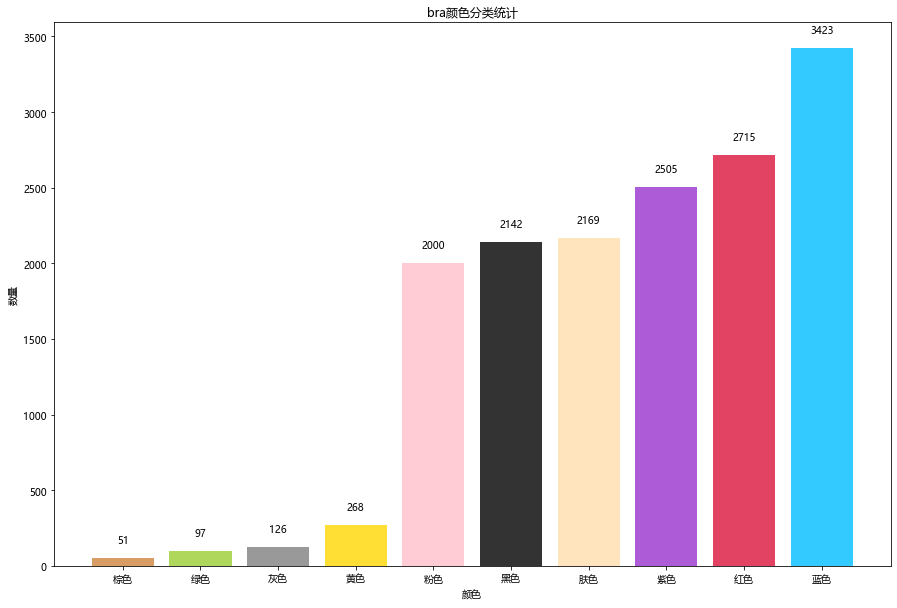

In [14]:
figsize = 15,10    #控制图像大小
figure, ax = plt.subplots(figsize=figsize)
histogram(color_info,title='bra颜色分类统计',name_x='颜色',name_y='数量',Color = color_to_color(color_info))

In [15]:
size_info = bra['productSize'].value_counts(ascending=True)
size_info

38/85ab中厚2cm        1
95E                 1
34/75c薄款0.8cm       1
90E                 3
95D                 4
90A                 4
95C                 4
75E                 5
80E                 8
85E                17
80D                18
85D                20
90B                20
90D                21
70C                27
90C                39
34/75ab中厚2cm       64
170/82/XL          75
85A                99
160/70/M          113
165/76/L          152
70A               171
85C               259
80A               270
75C               356
75D               360
75A               424
70B               459
80C               581
85B               998
80B              3968
75B              6954
Name: productSize, dtype: int64

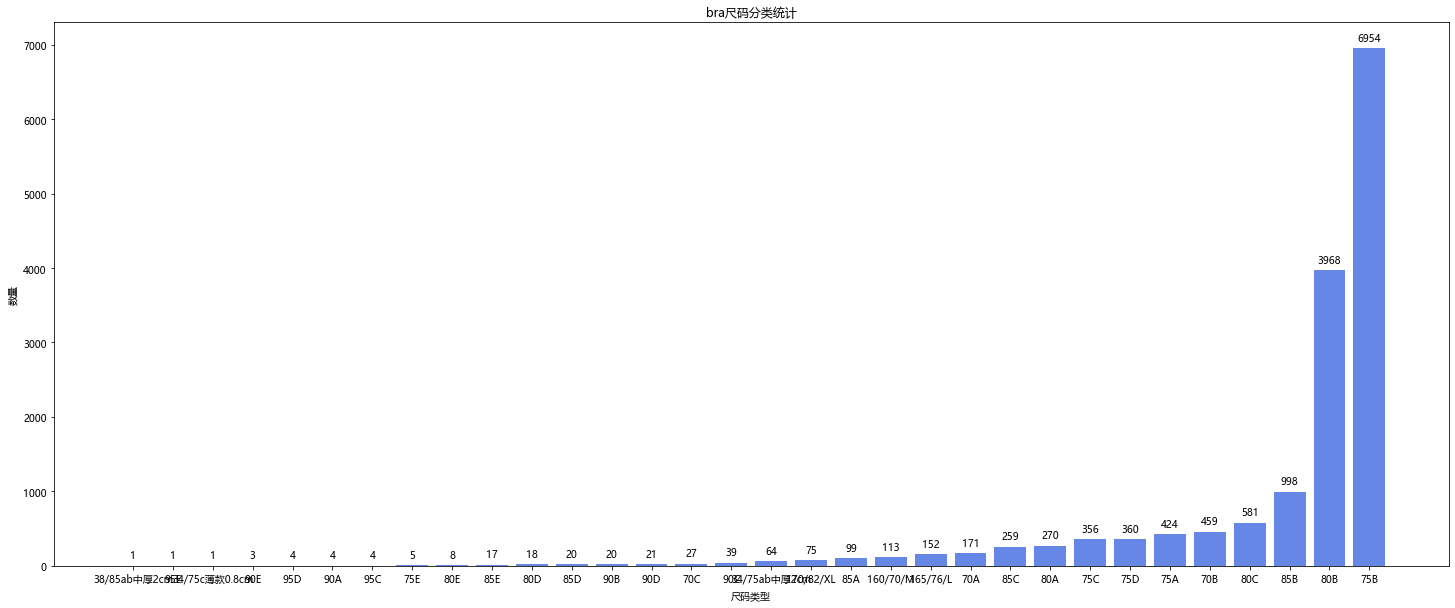

In [16]:
figsize = 25,10
figure, ax = plt.subplots(figsize=figsize)
histogram(size_info,title='bra尺码分类统计',name_x='尺码类型',name_y='数量')

In [17]:
composite_data = bra['productSize'] + bra['productColor']
composite_data.rename('composite')

0        75C棕色
1        80B棕色
2        80B棕色
3        75B棕色
4        80B棕色
         ...  
15491    75A粉色
15492    75B粉色
15493    75A粉色
15494    80C粉色
15495    75B粉色
Name: composite, Length: 15496, dtype: object

In [18]:
composite_info = composite_data.value_counts(ascending=False)
composite_info

75B紫色              2130
80B蓝色              1532
75B粉色              1188
80B红色              1137
75B蓝色              1133
                   ... 
90D紫色                 1
70A灰色                 1
85A绿色                 1
34/75c薄款0.8cm蓝色       1
95C肤色                 1
Length: 156, dtype: int64

In [19]:
composite_info = composite_info[:20]

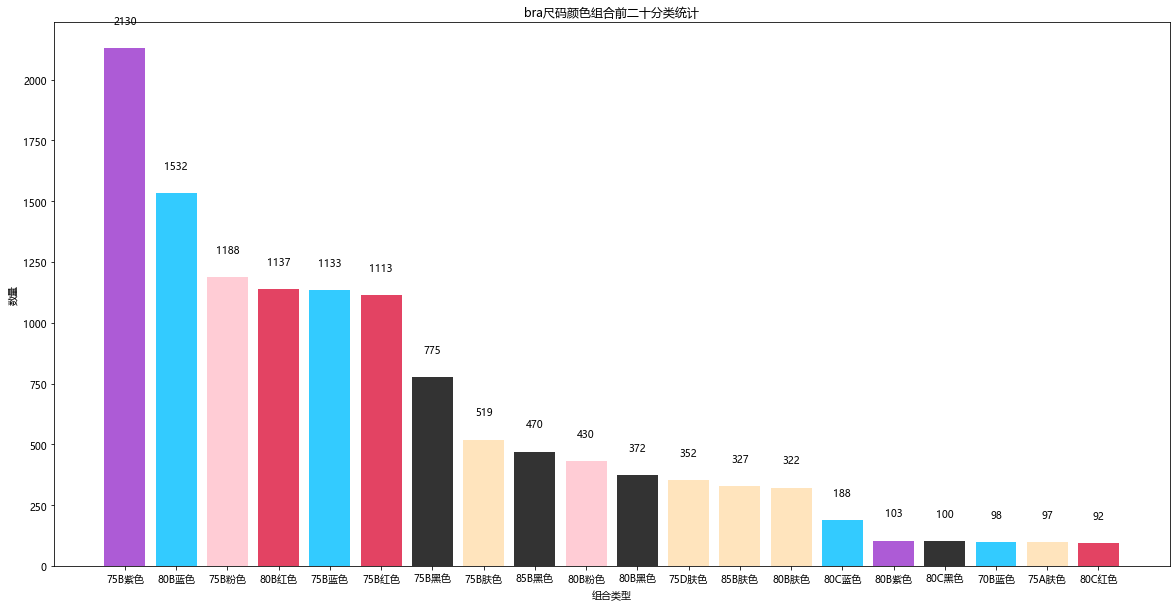

In [20]:
figsize = 20,10
figure, ax = plt.subplots(figsize=figsize)
histogram(composite_info,title='bra尺码颜色组合前二十分类统计',name_x='组合类型',name_y='数量',Color = color_to_color(composite_info))